In [2]:
import warnings 
warnings.filterwarnings('ignore')
import tensorflow
tensorflow.random.set_seed(13)
tensorflow.debugging.set_log_device_placement(False)
tensorflow.config.experimental.list_physical_devices('GPU')

[]

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
training_parameters=ImageDataGenerator(rotation_range=0.2,rescale=1./255,brightness_range=[2,6],horizontal_flip=True)

In [5]:
validation_parameters=ImageDataGenerator(rescale=1./255)

In [6]:
test_parameters=ImageDataGenerator(rescale=1./255)

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
training_path=r"C:\Users\Garv Khurana\OneDrive\Desktop\train-20240414T140901Z-001\train"
test_path=r"C:\Users\Garv Khurana\OneDrive\Desktop\test-20240414T140227Z-001\test"
vali_path=r"C:\Users\Garv Khurana\OneDrive\Desktop\val-20240414T140148Z-001\val"

In [13]:
training_df=training_parameters.flow_from_directory(directory=training_path,batch_size=64,target_size=(256,256),color_mode="rgb")
from glob import glob

Found 1951 images belonging to 4 classes.


In [14]:
test_df=test_parameters.flow_from_directory(directory=test_path,batch_size=64,target_size=(256,256),color_mode="rgb")

Found 36 images belonging to 5 classes.


In [15]:
vali_df=validation_parameters.flow_from_directory(directory=vali_path,batch_size=64,target_size=(256,256),color_mode="rgb")

Found 324 images belonging to 4 classes.


In [25]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [26]:
model=Sequential()

In [27]:
vgg=VGG19(include_top=False,weights="imagenet",input_shape=(256,256,3))

In [28]:
vgg.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <Conv2D name=block3_conv4, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <Conv2D name=block4_conv4, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <Conv2D name=block5_conv4, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [29]:
layers=vgg.layers
for layer in layers:
    model.add(layer)

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
for layer in model.layers:
    layer.trainable=False

In [32]:
from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [33]:
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=50,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation="softmax"))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 36,930,066 (140.88 MB)

 Trainable params: 16,905,682 (64.49 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [35]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [40]:
model_hist=model.fit(training_df,epochs=25,batch_size=64,validation_data=vali_df,verbose=1)

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 422s 13s/step - accuracy: 0.6681 - loss: 0.7442 - val_accuracy: 0.6512 - val_loss: 0.8154
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 416s 13s/step - accuracy: 0.7085 - loss: 0.7005 - val_accuracy: 0.6296 - val_loss: 0.8403
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 411s 13s/step - accuracy: 0.7337 - loss: 0.6212 - val_accuracy: 0.5957 - val_loss: 1.0087
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 438s 14s/step - accuracy: 0.7166 - loss: 0.6566 - val_accuracy: 0.6327 - val_loss: 0.9214
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 446s 14s/step - accuracy: 0.7065 - loss: 0.6754 - val_accuracy: 0.5957 - val_loss: 1.4124
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 436s 14s/step - accuracy: 0.7244 - loss: 0.6340 - val_accuracy: 0.6142 - val_loss: 0.8108
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 410s 13s/step - accuracy: 0.7557 - loss: 0.5782 - val_accuracy: 0.6142 - val_loss: 0.9561
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 263s 8s/step - accuracy: 0.7566 - loss: 0.5469 - val_accuracy: 0.6

In [42]:
model_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

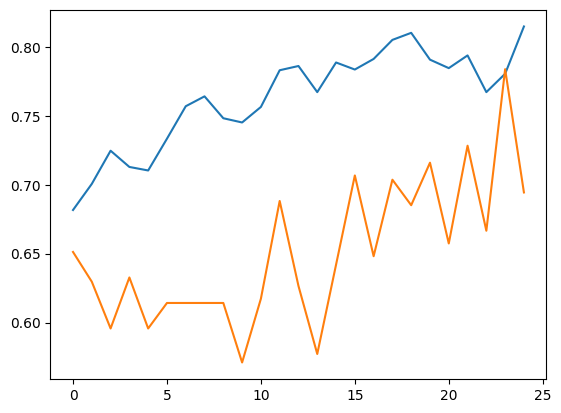

In [43]:
import matplotlib.pyplot as plt
plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"])

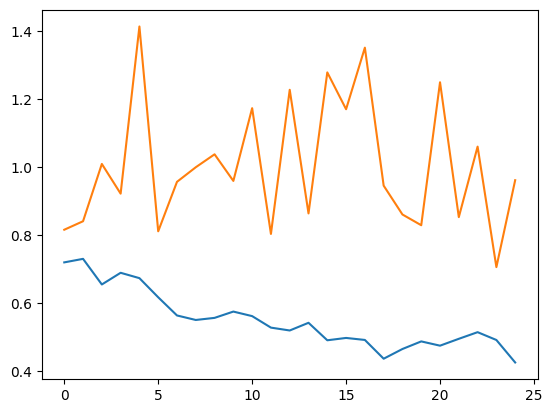

In [44]:
plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"])

In [56]:
pred=model.predict(test_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [57]:
pred

array([[4.7834411e-01, 5.6966759e-02, 4.1377804e-01, 5.0911069e-02],
       [7.1406909e-03, 9.3816531e-01, 1.4085658e-03, 5.3285412e-02],
       [1.9847213e-01, 3.1291276e-01, 1.8353534e-01, 3.0507976e-01],
       [3.6456576e-01, 3.2820691e-07, 6.3543391e-01, 7.0871572e-08],
       [2.6311937e-01, 2.5766820e-01, 2.3570614e-01, 2.4350622e-01],
       [4.8052582e-01, 1.7895408e-03, 5.1674342e-01, 9.4119064e-04],
       [5.6936988e-05, 9.9220932e-01, 4.7922917e-06, 7.7288849e-03],
       [5.1712954e-01, 2.7434181e-02, 4.3107852e-01, 2.4357770e-02],
       [1.5571549e-08, 9.9965584e-01, 3.5380859e-10, 3.4417232e-04],
       [3.6058776e-05, 9.9345338e-01, 2.8222555e-06, 6.5078419e-03],
       [5.7497346e-01, 7.6966360e-02, 3.1330118e-01, 3.4758952e-02],
       [3.2640524e-05, 9.9099815e-01, 3.0852113e-06, 8.9661349e-03],
       [5.0326675e-01, 1.8372032e-03, 4.9378750e-01, 1.1084862e-03],
       [1.8227500e-07, 9.9932730e-01, 4.9707873e-09, 6.7246775e-04],
       [2.6462823e-01, 4.8806483e-

In [58]:
import numpy as np
pred=np.argmax(pred,axis=1)

In [59]:
pred

array([0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1], dtype=int64)

In [60]:
model.save("classification.h5")